# Analysis of Building Meta Data 

### ASHRAE Energy Prediction Competition

#### By Edward Heronzy

This Kernel takes a look at the information given in the building_metadata.csv that is part of the ASHRAE competition

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FILE_DIR = "C:/Users/edher/Desktop/ML/datasets/ASHRAE_Great_Energy_Predictor_III"
building_meta_file = 'building_metadata.csv'

In [3]:
building_meta = pd.read_csv(os.path.join(FILE_DIR, building_meta_file), delimiter=',')

In [4]:
building_meta.head(10)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
5,0,5,Education,8000,2000.0,NaN
6,0,6,Lodging/residential,27926,1981.0,NaN
7,0,7,Education,121074,1989.0,NaN
8,0,8,Education,60809,2003.0,NaN
9,0,9,Office,27000,2010.0,NaN


In [5]:
building_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     675 non-null float64
floor_count    355 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


So, we have five numerical features, and one categorical. *site_id* is a Foriegn Key refering to the weather data. *building_id* is a Foriegn Key refering to the train and test data. It is also this table's primary key

In [6]:
building_meta.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [7]:
building_meta.nunique()

site_id          16
building_id    1449
primary_use      16
square_feet    1397
year_built      116
floor_count      18
dtype: int64

In [8]:
building_meta.isnull().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

Notable things we can discern from this information

1. There are 1449 unique building ids
2. Some building have missing information for their year_built and floor_count
3. The floor count range is 25, yet there are only 18 unique values
4. The average builidng age is 1968 with the newest building in the data being built in 2017
5. A some buildings have the *exact* same square footage

Lets think of some questions we can explore with the data...

##### 1) Which floor_count unique values are missing?

Since there are only 18 unique values for this feature, you can just look at them all directly

In [9]:
np.sort(building_meta.floor_count.unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 16., 19., 21., 26., nan])

The missing unique floor counts are 15, 17, 18, 20, 22, 23, 24, and 25. If you don't have a lot of unique values, this method can be useful for defermining which ones are missing. If, however, you have many unique values, then you may need to get more creative to avoid human error

In [10]:
floor_count_max = building_meta.floor_count.max()
floor_count_min = building_meta.floor_count.min()
possible_floors = np.arange(floor_count_min, floor_count_max+1, dtype='float64')
actual_floors = building_meta.floor_count.unique()
missing_floors = np.setdiff1d(possible_floors, actual_floors)
print(missing_floors)

[15. 17. 18. 20. 22. 23. 24. 25.]


##### 2) What are the most common building primary uses?

Utilizing the *groupby* method similar to how SQL does it

In [11]:
primary_use_1 = building_meta.groupby(['primary_use'], as_index=False).count()[['primary_use','building_id']]
primary_use_1.sort_values(by='building_id', ascending=False, inplace=True)

In [12]:
primary_use_1

,primary_use,building_id
0,Education,549
6,Office,279
1,Entertainment/public assembly,184
9,Public services,156
4,Lodging/residential,147
7,Other,25
3,Healthcare,23
8,Parking,22
15,Warehouse/storage,13
5,Manufacturing/industrial,12


Now using another, simpiler method via *groupby*

In [13]:
primary_use_2 = building_meta.groupby('primary_use')['building_id'].nunique().sort_values(ascending=False)

In [14]:
primary_use_2

primary_use
Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: building_id, dtype: int64

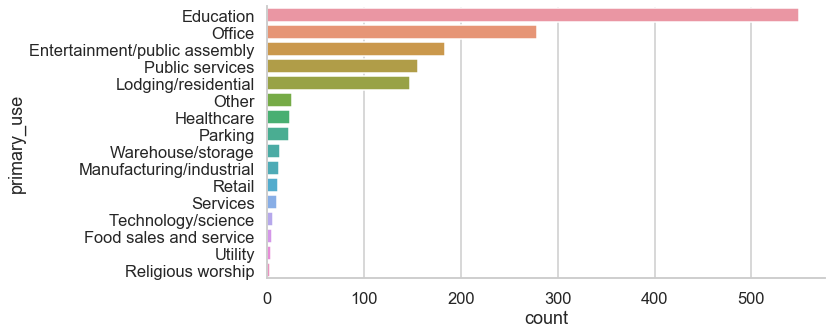

In [15]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(y='primary_use', data=building_meta, order=primary_use_1['primary_use'])
sns.despine()

##### 3) What is the distribution of square footage by building primary use?

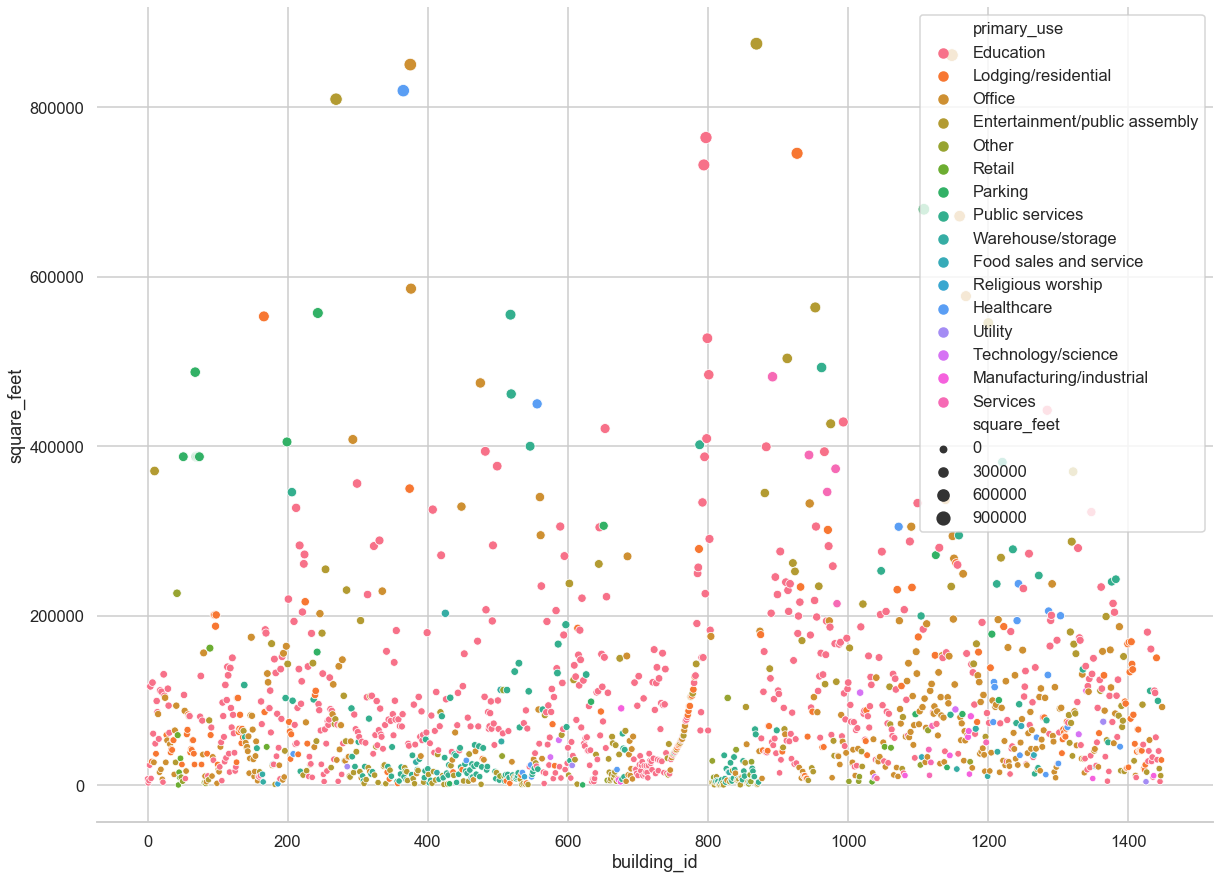

In [16]:
fig, axes = plt.subplots(figsize=(20,15));
sns.scatterplot(data=building_meta, x='building_id', y='square_feet', hue='primary_use', size='square_feet')
sns.despine(left=True)

This looks a bit messy, so lets clean it up a bit with the diffent type of graph

In [17]:
'''
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25,22))
n_row = 0
n_col = 0
max_row = 4
max_col = 4
for use in building_meta['primary_use'].unique():
    sub_df = building_meta[building_meta['primary_use'] == use]
    if n_row == max_row:
        n_row = 0
        n_col += 1
    sns.scatterplot(data=sub_df, x='building_id', y='square_feet', ax=axes[n_row,n_col])
    axes[n_row, n_col].set_title(use)
    n_row += 1
'''

"\nfig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25,22))\nn_row = 0\nn_col = 0\nmax_row = 4\nmax_col = 4\nfor use in building_meta['primary_use'].unique():\n    sub_df = building_meta[building_meta['primary_use'] == use]\n    if n_row == max_row:\n        n_row = 0\n        n_col += 1\n    sns.scatterplot(data=sub_df, x='building_id', y='square_feet', ax=axes[n_row,n_col])\n    axes[n_row, n_col].set_title(use)\n    n_row += 1\n"

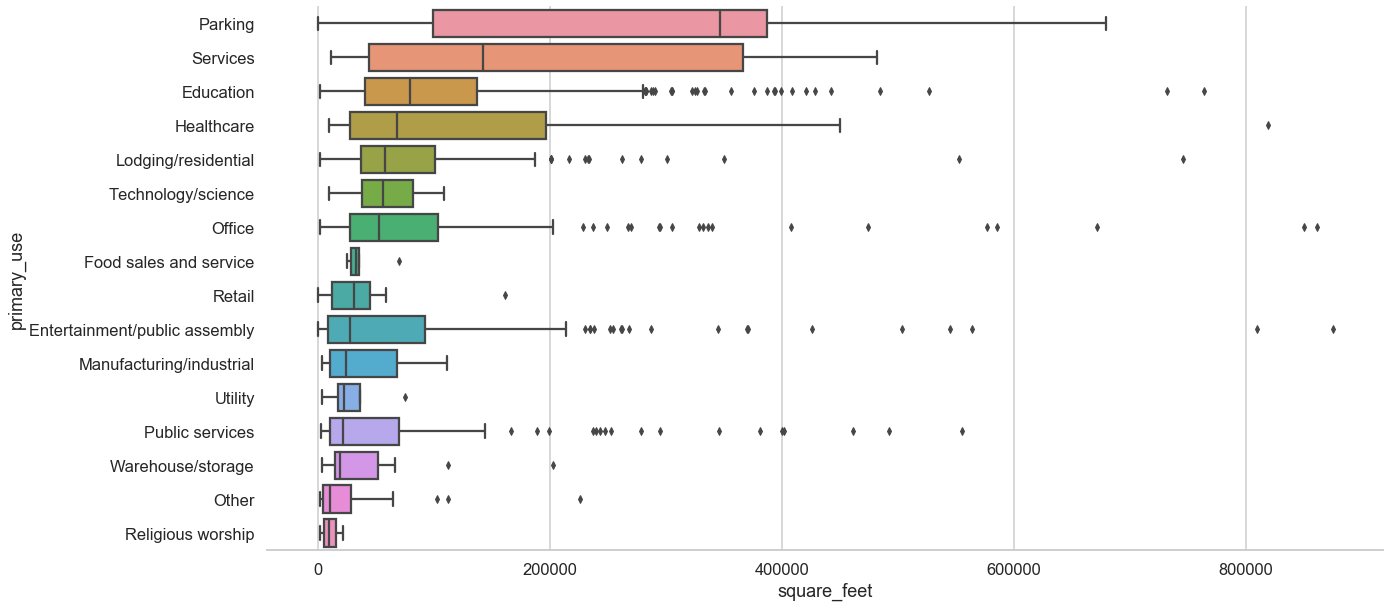

In [18]:
primary_use_by_median = building_meta.groupby(['primary_use'], as_index=False).median()[['primary_use','square_feet']]
primary_use_by_median.sort_values(by='square_feet', ascending=False, inplace=True)
#print(primary_use_by_median)
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=building_meta, y='primary_use', x='square_feet', order=primary_use_by_median['primary_use'])
sns.despine(left=True)

#### 4) Which building types belong to which site?

In [19]:
sites = building_meta.groupby(['site_id','primary_use'], as_index=False).count()[['site_id','primary_use','building_id']]

In [20]:
sites.head(10)

,site_id,primary_use,building_id
0,0,Education,30
1,0,Entertainment/public assembly,5
2,0,Lodging/residential,27
3,0,Office,24
4,0,Other,5
5,0,Parking,8
6,0,Retail,6
7,1,Education,22
8,1,Entertainment/public assembly,1
9,1,Lodging/residential,10


In [21]:
sites_pivot = sites.pivot(index='site_id', columns='primary_use', values='building_id')

In [22]:
sites_pivot.fillna(0.0, inplace=True)

In [23]:
sites_pivot

primary_use,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
site_id,,,,,,,,,,,,,,,,
0,30.0,5.0,0.0,0.0,27.0,0.0,24.0,5.0,8.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
1,22.0,1.0,0.0,0.0,10.0,0.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,61.0,21.0,2.0,1.0,12.0,0.0,24.0,0.0,3.0,6.0,1.0,1.0,0.0,0.0,1.0,2.0
3,92.0,44.0,0.0,6.0,11.0,0.0,23.0,4.0,1.0,86.0,1.0,1.0,0.0,0.0,0.0,5.0
4,66.0,9.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0,2.0,1.0,0.0
5,49.0,18.0,0.0,1.0,1.0,3.0,11.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
6,15.0,4.0,0.0,0.0,12.0,0.0,11.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,24.0,0.0,0.0,0.0,0.0,7.0,9.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,2.0


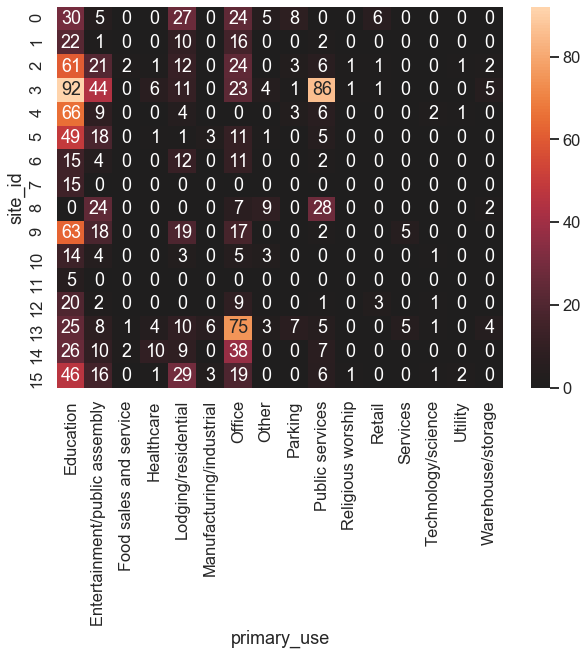

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(sites_pivot, annot=True, center=0)

#### 5) What is the average year built for each building type

Note, that this may not account for buildings that were converted from one type to another or expanded from their origianl size after the year they were built. This could be an issue with the data that may potentially affect models utilizing year built as a feature

In [25]:
year_built = building_meta.groupby('primary_use').mean()['year_built']

In [26]:
year_built

primary_use
Education                        1962.579755
Entertainment/public assembly    1970.904110
Food sales and service           2012.000000
Healthcare                       1982.250000
Lodging/residential              1973.282353
Manufacturing/industrial         1957.666667
Office                           1972.894118
Other                            1981.500000
Parking                          1998.500000
Public services                  1964.333333
Religious worship                1979.000000
Retail                           1997.571429
Services                                 NaN
Technology/science               1939.000000
Utility                          1976.333333
Warehouse/storage                1983.400000
Name: year_built, dtype: float64

Text(0.5, 0, 'Primary Use')

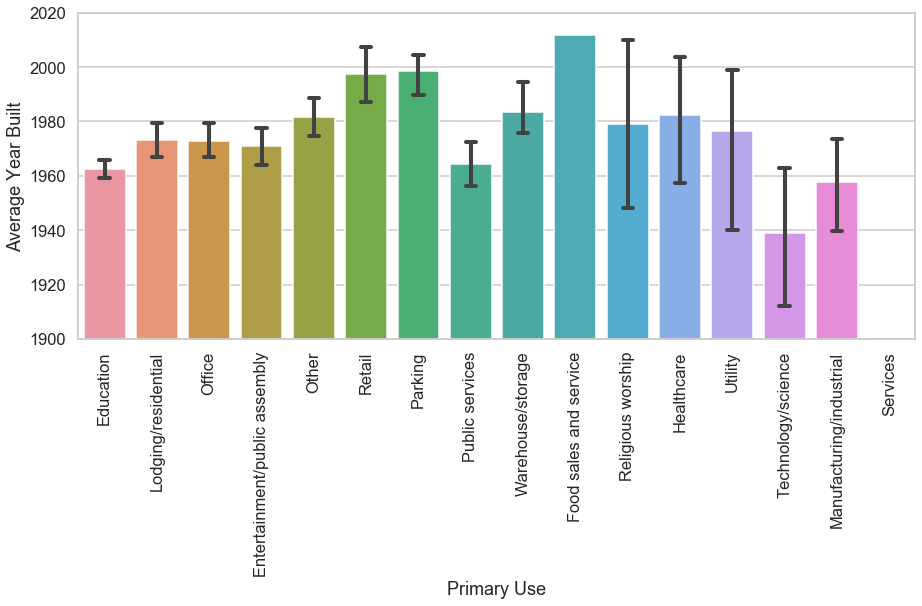

In [27]:
from numpy import mean
fig, axes = plt.subplots(figsize=(15,6))
plt.xticks(rotation='vertical')
sns.barplot(data=building_meta, x='primary_use', y='year_built', estimator=mean, capsize=0.2)
plt.ylim(1900,2020);
plt.ylabel('Average Year Built')
plt.xlabel('Primary Use')

##### 6) What are the (if any) coorelations between year built and building size

Lets get a basic visual first

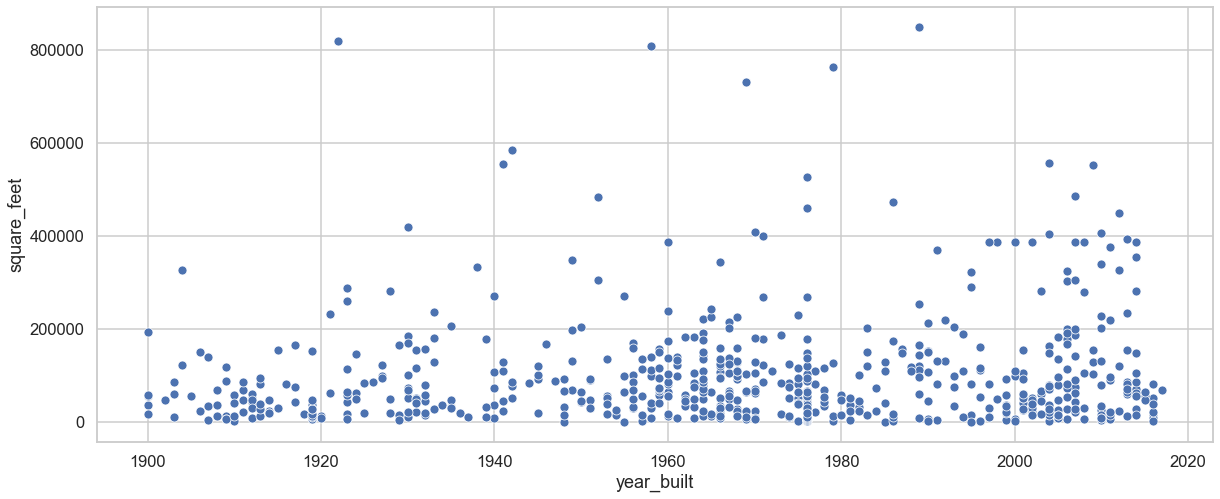

In [28]:
fig, axes = plt.subplots(figsize=(20,8))
sns.scatterplot(data=building_meta, x='year_built', y='square_feet')

Let's try adjusting the limits

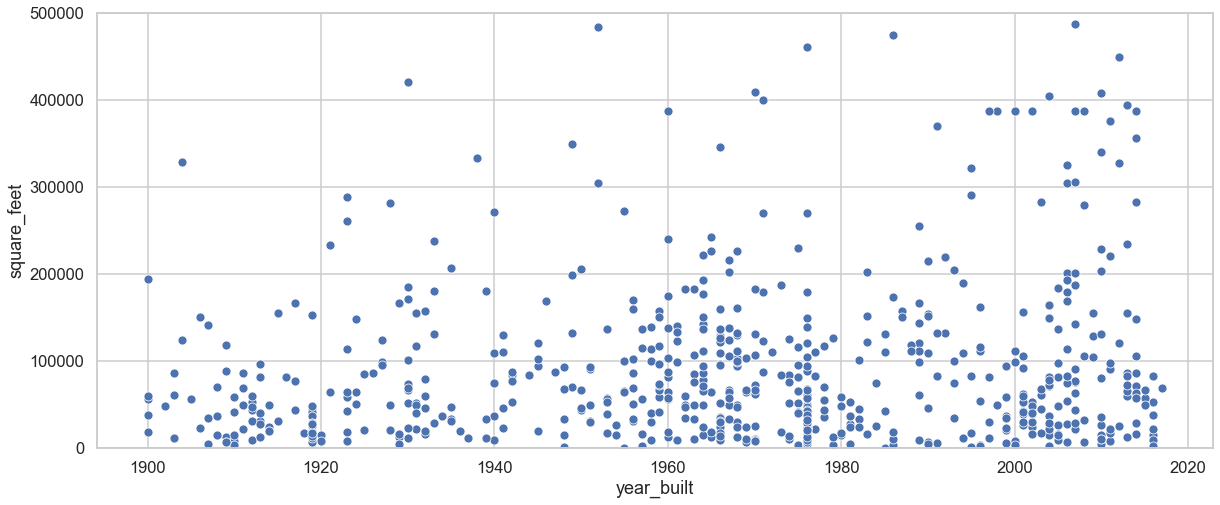

In [29]:
fig, axes = plt.subplots(figsize=(20,8))
plt.ylim(top=500000)
sns.scatterplot(data=building_meta, x='year_built', y='square_feet')

Lets do some regression analysis (note that goes with treating 'year_built' as quantitative data. If we were to treat it as categorical data, then we would do ANOVA analysis similar to the next section)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lin_reg = LinearRegression()
X = building_meta.dropna(subset=['year_built'])[['year_built']]
y = building_meta.dropna(subset=['year_built'])['square_feet']

In [32]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_pred = lin_reg.predict(X)

In [34]:
X['y_pred'] = y_pred

In [35]:
X.head()

,year_built,y_pred
0,2008.0,113778.501869
1,2004.0,112149.205815
2,1991.0,106853.993639
3,2002.0,111334.557788
4,1975.0,100336.809423


In [36]:
R2_score = lin_reg.score(X[['year_built']], y)

In [37]:
R2_score

0.011894835472189613

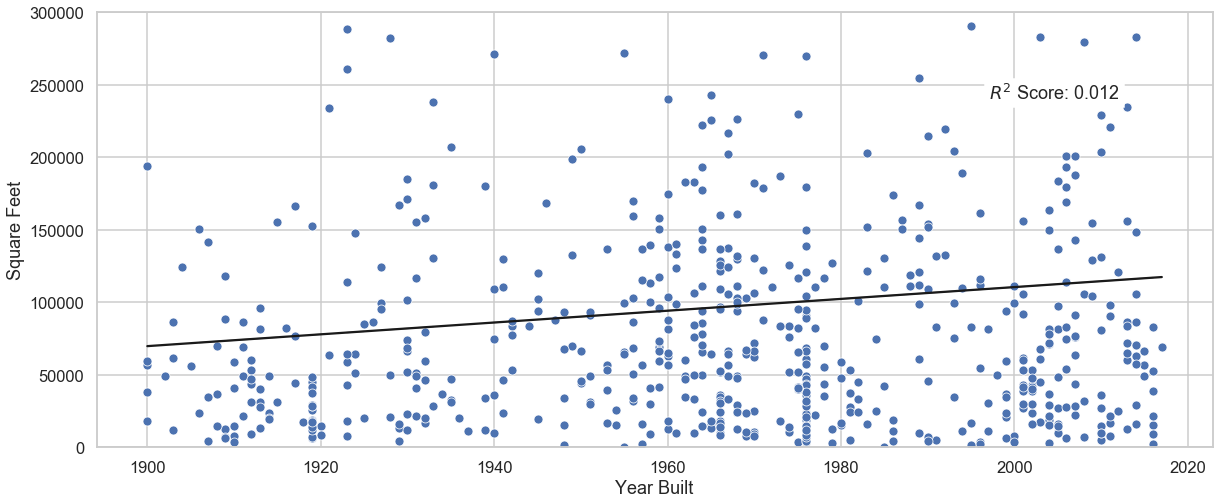

In [38]:
fig, axes = plt.subplots(figsize=(20,8))
plt.ylim(top=300000)
sns.scatterplot(data=building_meta, x='year_built', y='square_feet')
sns.lineplot(data=X, x='year_built', y='y_pred', color='k')
plt.xlabel('Year Built')
plt.ylabel('Square Feet')
plt.text(0.8,0.8,s='$R^2$ Score: '+str(round(R2_score, 3)), bbox=dict(facecolor='white', alpha=1), transform=axes.transAxes);

So we can see that the $R^2$ score is about 0.012, meaning that about 1.2% of the variance in building square feet is accounded for by the year built. So there is a very weak, positive coorelation between these two variables

##### 7) What are the (if any) coorelations between primary use and size?

A better way to frame this would be, "Is there significant variance in average building size across building types?" The statistical test to determine this is *could* be a One-Way ANOVA (https://www.statisticssolutions.com/manova-analysis-anova/)

There are some caviates though, and assumptions about the data that must be verified first. 

1. The population from which the samples are drawn should be normally distributed 

We can look at histograms of the data to see if the samples are themselves normally distributed

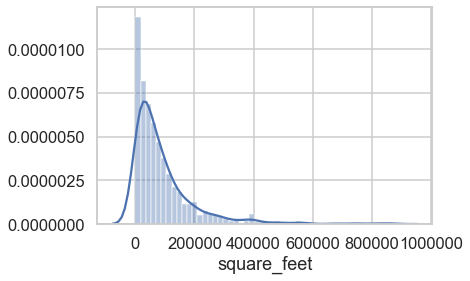

In [39]:
sns.distplot(a=building_meta['square_feet'])

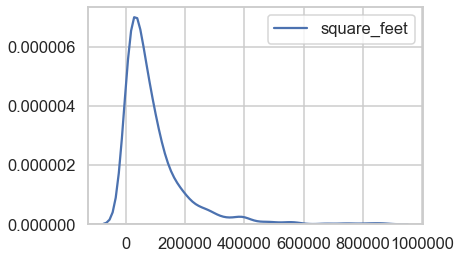

In [40]:
sns.kdeplot(data=building_meta['square_feet'])

It looks like the data has a bit of a right skew. Lets break it down by categories

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026698B10358>,
      dtype=object)

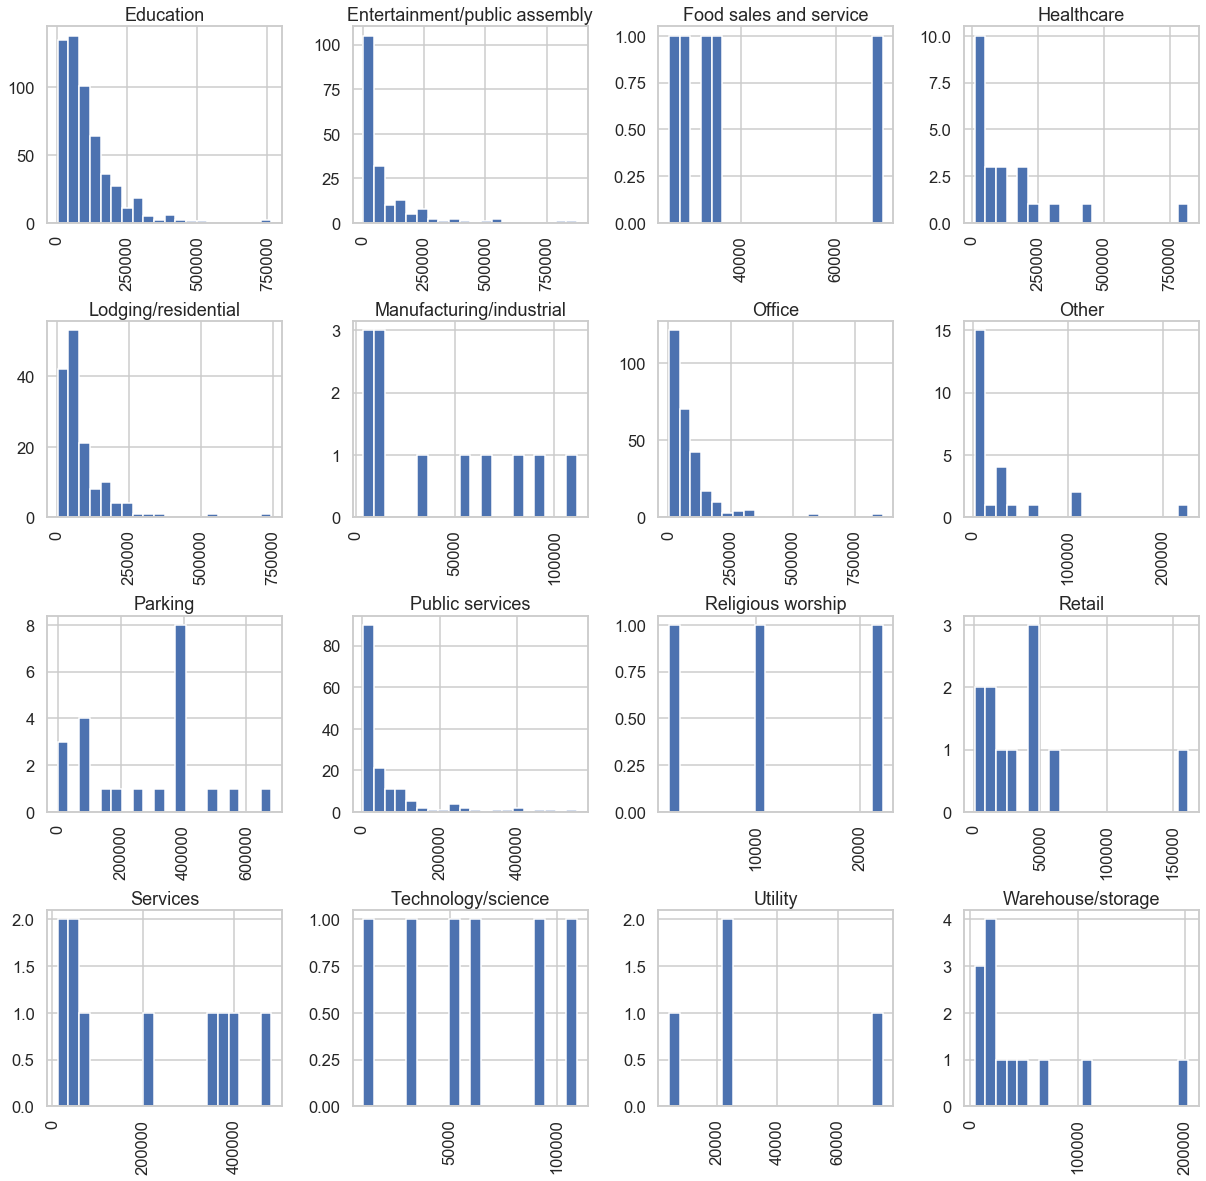

In [41]:
building_meta.hist(column='square_feet', by='primary_use', figsize=(20,20), bins=20)

We can also look back at the figure from question 3 and we can see that many of the categories are significantly skewed. To further confirm this, we can preform the Shapiro–Wilk test on the data (https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

In [42]:
def Shapiro_Wilk(x,alpha_=0.05,category='all'):
    
    from scipy.stats import shapiro
    size = x.count()
    W,p = shapiro(x)
    alpha = alpha_
    print('\033[1mCategory: {}\033[0m\nSample Size: {}\nW value: {}\np value: {}\nalpha level: {}'.format(category,size,W,p,alpha_))
    if p<alpha:
        print('There is sufficient evidence that the data is not from a normally distributed population\n')
    else:
        print('There is sufficient evidence that the data is from a noramlly distributed population\n')

In [43]:
Shapiro_Wilk(building_meta['square_feet'])

Category: all
Sample Size: 1449
W value: 0.7057210206985474
p value: 1.1210387714598537e-44
alpha level: 0.05
There is sufficient evidence that the data is not from a normally distributed population



In [44]:
primary_use_types = building_meta['primary_use'].unique()

In [45]:
for type in primary_use_types:
    Shapiro_Wilk(x=building_meta[building_meta['primary_use']==type]['square_feet'],category=type)

Category: Education
Sample Size: 549
W value: 0.8057708740234375
p value: 3.8027249477356823e-25
alpha level: 0.05
There is sufficient evidence that the data is not from a normally distributed population

Category: Lodging/residential
Sample Size: 147
W value: 0.6658963561058044
p value: 7.903626049649454e-17
alpha level: 0.05
There is sufficient evidence that the data is not from a normally distributed population

Category: Office
Sample Size: 279
W value: 0.6047871112823486
p value: 8.106880455189917e-25
alpha level: 0.05
There is sufficient evidence that the data is not from a normally distributed population

Category: Entertainment/public assembly
Sample Size: 184
W value: 0.6163429617881775
p value: 4.248570232073689e-20
alpha level: 0.05
There is sufficient evidence that the data is not from a normally distributed population

Category: Other
Sample Size: 25
W value: 0.6096808910369873
p value: 5.495608093042392e-07
alpha level: 0.05
There is sufficient evidence that the data is n

So, from the specific categories, only Parking, Religious Worship, Utility, Technology/science, and Services have sufficient evidence to state that their samples are from a normally distributed population. It should be noted, that these categories have very low sample sizes compared to other categories that did not have sufficient evidence. Thus, the resulting p values and conclusions may not be statisically significant given the very small sample sizes. 

2. Sample cases should be independent of each other

It could be resonably assumed that the buildings picked are independent of each other, though there could be cases where buildings that are close to each could effect each others' respective sizes

3. Variance among the groups should be approximately equal

We can check this by remembering that variance is the square of the standard deviation

In [46]:
building_types_std = building_meta.groupby(['primary_use']).std()['square_feet']

In [47]:
building_types_std = building_types_std.reset_index()
building_types_std.rename(columns={'square_feet':'square_feet_std'}, inplace=True)
building_types_std['square_feet_var'] = building_types_std['square_feet_std']**2
building_types_std['var_mean'] = building_types_std['square_feet_var'].mean()
building_types_std['diff_from_var_mean'] = building_types_std['var_mean'].subtract(building_types_std['square_feet_var'])

In [48]:
building_types_std

,primary_use,square_feet_std,square_feet_var,var_mean,diff_from_var_mean
0,Education,94319.250196,8.896121e+09,1.083446e+10,1.938343e+09
1,Entertainment/public assembly,130104.100833,1.692708e+10,1.083446e+10,-6.092613e+09
2,Food sales and service,18024.387881,3.248786e+08,1.083446e+10,1.050959e+10
3,Healthcare,185359.209399,3.435804e+10,1.083446e+10,-2.352357e+10
4,Lodging/residential,94283.546574,8.889387e+09,1.083446e+10,1.945077e+09
5,Manufacturing/industrial,38243.723330,1.462582e+09,1.083446e+10,9.371882e+09
6,Office,112576.332504,1.267343e+10,1.083446e+10,-1.838966e+09
7,Other,50265.105779,2.526581e+09,1.083446e+10,8.307884e+09
8,Parking,191157.532085,3.654120e+10,1.083446e+10,-2.570674e+10
9,Public services,101352.079324,1.027224e+10,1.083446e+10,5.622204e+08


As we can see, there is a lot of deviation in the square feet variance between the building types. We can verify by using the Brown–Forsythe test (https://en.wikipedia.org/wiki/Brown%E2%80%93Forsythe_test) 

Scipy.stats implements this with the levene() function. The Levene Test is similar to the Brown-Forsythe but uses mean while the later uses median. Since the data is significantly skewed with a lot of variance, the median method will be better. We can use the levene() function with the 'median' option to implement the Brown-Forsythe

In [49]:
building_size_by_type = building_meta.pivot(index='building_id', columns='primary_use', values='square_feet')

In [50]:
building_size_by_type.head(10)

primary_use,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
building_id,,,,,,,,,,,,,,,,
0,7432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5376.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,116607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,27926.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,121074.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,60809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
s1 = building_size_by_type['Education'].dropna()
s2 = building_size_by_type['Entertainment/public assembly'].dropna()
s3 = building_size_by_type['Healthcare'].dropna()
s4 = building_size_by_type['Lodging/residential'].dropna()
s5 = building_size_by_type['Manufacturing/industrial'].dropna()
s6 = building_size_by_type['Office'].dropna()
s7 = building_size_by_type['Other'].dropna()
s8 = building_size_by_type['Parking'].dropna()
s9 = building_size_by_type['Religious worship'].dropna()
s10 = building_size_by_type['Retail'].dropna()
s11 = building_size_by_type['Services'].dropna()
s12 = building_size_by_type['Technology/science'].dropna()
s13 = building_size_by_type['Utility'].dropna()
s14 = building_size_by_type['Warehouse/storage'].dropna()

In [52]:
from scipy.stats import levene
alpha = 0.05
W,p = levene(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,center='median')
print('W value: {}\np value: {}\nalpha value: {}'.format(W,p,alpha))
if p>alpha:
    print('There is no sufficient evidence that the population variances are not equal')
else:
    print('There is sufficient evidence that the population variances are not equal')

W value: 4.444003719845989
p value: 1.992825725062296e-07
alpha value: 0.05
There is sufficient evidence that the population variances are not equal
